# Enrollment rate per neighborhood
## Name: Zhexi Xu (zhx77)

# Introduction

This project aims to determine the best neighborhood in Pittsburgh based on educational indicators. Our approach involves analyzing school enrollment data from the Pittsburgh American Community Survey 2015. We will develop a metric to evaluate each neighborhood's educational opportunities and access to schooling.

# The Metric

Our metric will focus on the percentage of individuals enrolled in various levels of schooling within each neighborhood. We will measure features such as enrollment in nursery school, kindergarten, elementary school, high school, college undergraduate years, and graduate or professional school. By analyzing these features, we can assess the educational landscape of each neighborhood.

# Data Description

The data was extracted from the Pittsburgh American Community Survey 2015, School Enrollment, All races.

[Link to the dataset](https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv)


## Appropriate Indexes for Data Analysis

To evaluate the best neighborhood based on education, we can analyze the following indexes:

1. **Enrollment Rate**: The percentage of individuals enrolled in school compared to the total population.

2. **Not Enrolled Rate**: The percentage of individuals not enrolled in school compared to the total population.

3. **Kindergarten Enrollment Rate (grade 1 to 12)**: The percentage of individuals enrolled in kindergarten compared to the total population.

4. **Undergraudate Rate**: The percentage of individuals enrolled in college or undergraduate programs compared to the total population.

5. **Graduate Enrollment Rate**: The percentage of individuals enrolled in graduate or professional school compared to the total population.



## Choice of Index for Data Analysis

These indexes provide insights into different aspects of education within each neighborhood, such as early childhood education, primary education, higher education, and overall enrollment status.


To evaluate the best neighborhood based on education, the percentage of individuals enrolled in higher education institutions (college, undergraduate, graduate, or professional school) is chosen as the primary index for data analysis. Here's why this index is the best choice:

1. **Reflects Educational Attainment**: Enrollment in higher education institutions indicates individuals' pursuit of advanced learning beyond high school. It reflects the educational attainment level of the population, which is a key indicator of a neighborhood's educational quality and opportunities.

2. **Long-Term Impact**: Higher education is associated with better career prospects, higher income potential, and overall socio-economic advancement. Analyzing enrollment in higher education institutions provides insights into the long-term socio-economic development potential of each neighborhood.

3. **Accessibility and Equity**: Analyzing enrollment in higher education institutions allows us to assess the accessibility and equity of higher education opportunities within each neighborhood. Disparities in enrollment rates may indicate unequal access to educational resources and opportunities, highlighting areas for intervention and improvement.


# Data preparation

1) Input data (enrollment data and popupation data for each neighborhood)

2) Only selected interested columns

3) Caculate enrollment rate (enrollment/population * 100%)

4) Visualization 

In [11]:
import pandas as pd

# Load the dataset
data_enrollment = "school_enrollment.csv"
school_enrollment_data = pd.read_csv(data_enrollment)
data_population = "population.csv"
population_data = pd.read_csv(data_population)

# Rename
# Define a dictionary mapping old column names to new column names
column_rename_enroll = {
    "Estimate; Total:": "total enrollment",
    "Estimate; Not enrolled in school": "not enrolled",
    "Estimate; Enrolled in school: - Enrolled in kindergarten": "total enrolled in kindergarten",
    "Estimate; Enrolled in school: - Enrolled in grade 1": "grade 1",
    "Estimate; Enrolled in school: - Enrolled in grade 2": "grade 2",
    "Estimate; Enrolled in school: - Enrolled in grade 3": "grade 3",
    "Estimate; Enrolled in school: - Enrolled in grade 4": "grade 4",
    "Estimate; Enrolled in school: - Enrolled in grade 5": "grade 5",
    "Estimate; Enrolled in school: - Enrolled in grade 6": "grade 6",
    "Estimate; Enrolled in school: - Enrolled in grade 7": "grade 7",
    "Estimate; Enrolled in school: - Enrolled in grade 8": "grade 8",
    "Estimate; Enrolled in school: - Enrolled in grade 9": "grade 9",
    "Estimate; Enrolled in school: - Enrolled in grade 10": "grade 10",
    "Estimate; Enrolled in school: - Enrolled in grade 11": "grade 11",
    "Estimate; Enrolled in school: - Enrolled in grade 12": "grade 12",
    "Estimate; Enrolled in school: - Enrolled in college, undergradu": "undergraduate",
    "Estimate; Enrolled in school: - Graduate or professional school": "graduate"
}

school_enrollment_data.rename(columns=column_rename_enroll, inplace=True)

population_data['total population'] = population_data['Estimate; Total'] + population_data['Margin of Error; Total']

# Merge the two dataframes on the "Neighborhood" column
neigh_enroll_population = pd.merge(school_enrollment_data, population_data, on="Neighborhood", how="inner")

# Display the merged dataframe
print(neigh_enroll_population.head(5))

   _id_x       Neighborhood  Id_x  total enrollment  Margin of Error; Total:  \
0      1   Allegheny Center     1            1389.0               193.000000   
1      2     Allegheny West     2             343.0                96.000000   
2      3          Allentown     3            2520.0               449.503059   
3      4          Arlington     4            1823.0               342.302498   
4      5  Arlington Heights     5             213.0               115.000000   

   Estimate; Enrolled in school:  Margin of Error; Enrolled in school:  \
0                          394.0                            120.000000   
1                           61.0                             44.000000   
2                          965.0                            312.800256   
3                          427.0                            127.722355   
4                           40.0                             49.000000   

   Estimate; Enrolled in school: - Enrolled in nursery school, pre  \
0   

In [13]:
# Calculate rate
neigh_enroll_population['enrollment rate'] = (neigh_enroll_population['total enrollment'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 1 rate'] = (neigh_enroll_population['grade 1'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 2 rate'] = (neigh_enroll_population['grade 2'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 3 rate'] = (neigh_enroll_population['grade 3'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 4 rate'] = (neigh_enroll_population['grade 4'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 5 rate'] = (neigh_enroll_population['grade 5'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 6 rate'] = (neigh_enroll_population['grade 6'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 7 rate'] = (neigh_enroll_population['grade 7'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 8 rate'] = (neigh_enroll_population['grade 8'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 9 rate'] = (neigh_enroll_population['grade 9'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 10 rate'] = (neigh_enroll_population['grade 10'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 11 rate'] = (neigh_enroll_population['grade 11'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 12 rate'] = (neigh_enroll_population['grade 12'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['graduate rate'] = (neigh_enroll_population['graduate'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['undergraduate rate'] = (neigh_enroll_population['undergraduate'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['not enrolled rate'] = (neigh_enroll_population['not enrolled'] / neigh_enroll_population['total population']) * 100

enroll_rate = neigh_enroll_population[['Neighborhood', 'enrollment rate','not enrolled rate', 'grade 1 rate', 'grade 2 rate', 'grade 3 rate', 'grade 4 rate', 'grade 5 rate', 'grade 6 rate', 'grade 7 rate', 'grade 8 rate', 'grade 9 rate', 'grade 10 rate', 'grade 11 rate', 'grade 12 rate', 'graduate rate', 'undergraduate rate']]
print(enroll_rate.head(5))

        Neighborhood  enrollment rate  not enrolled rate  grade 1 rate  \
0   Allegheny Center        86.434350          61.916615      2.862477   
1     Allegheny West        78.132118          64.236902      3.644647   
2          Allentown        83.782911          51.699375      3.989662   
3          Arlington        82.856550          63.449119      0.227253   
4  Arlington Heights        53.517588          43.467337      0.000000   

   grade 2 rate  grade 3 rate  grade 4 rate  grade 5 rate  grade 6 rate  \
0      0.000000      0.000000      2.053516      0.000000      1.680149   
1      0.000000      0.000000      0.000000      0.000000      0.000000   
2      1.828595      3.191730      1.895090      1.994831      1.196899   
3      1.090816      1.636224      0.409056      0.863563      0.818112   
4      0.000000      0.000000      0.000000      0.000000      0.000000   

   grade 7 rate  grade 8 rate  grade 9 rate  grade 10 rate  grade 11 rate  \
0      0.000000      0.1244

# Bar chart: total enrollment rate
Enrollment rate across different neighborhoods, allowing for easy comparison and analysis

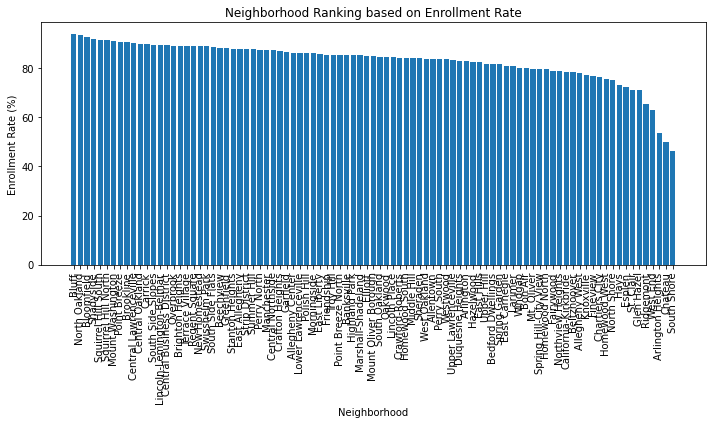

In [4]:
import matplotlib.pyplot as plt

# Sort the dataframe by enrollment rate
sorted_data_enrollment = enroll_rate.sort_values(by='enrollment rate', ascending=False)

# Plot the bar chart for enrollment rate
plt.figure(figsize=(10, 6))
plt.bar(sorted_data_enrollment['Neighborhood'], sorted_data_enrollment['enrollment rate'])
plt.title('Neighborhood Ranking based on Enrollment Rate')
plt.xlabel('Neighborhood')
plt.ylabel('Enrollment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Top 10 neighborhood based on total enrollment rate

In [7]:
# Sort the DataFrame by enrollment rate in descending order
enroll_rate_sorted = enroll_rate.sort_values(by='enrollment rate', ascending=False)

output_path = 'enrollment_rate.csv'

# Save the sorted dataframe to a CSV file
enroll_rate_sorted.to_csv(output_path, index=False)

# Iterate through each row in the sorted DataFrame, limited to the top 10 neighborhoods
for index, row in enroll_rate_sorted.head(10).iterrows():
    # Print the neighborhood's name and its enrollment rate
    print(f"Neighborhood: {row['Neighborhood']}")
    print(f"Enrollment Rate: {row['enrollment rate']}")
    print()

Neighborhood: Bluff
Enrollment Rate: 94.00933345429104

Neighborhood: North Oakland
Enrollment Rate: 93.49847803162554

Neighborhood: Bloomfield
Enrollment Rate: 92.76939986452656

Neighborhood: Shadyside
Enrollment Rate: 92.13819949856054

Neighborhood: Squirrel Hill South
Enrollment Rate: 91.60325732703427

Neighborhood: Squirrel Hill North
Enrollment Rate: 91.47553159363542

Neighborhood: Mount Washington
Enrollment Rate: 91.11645828970018

Neighborhood: Point Breeze
Enrollment Rate: 90.7801108603471

Neighborhood: Brookline
Enrollment Rate: 90.59732622016942

Neighborhood: Central Lawrenceville
Enrollment Rate: 90.20187662649306



In [ ]:
# Pick top 5 neighborhoods with highest enrollment rate, then evaluate the graduate/undergraduate rates

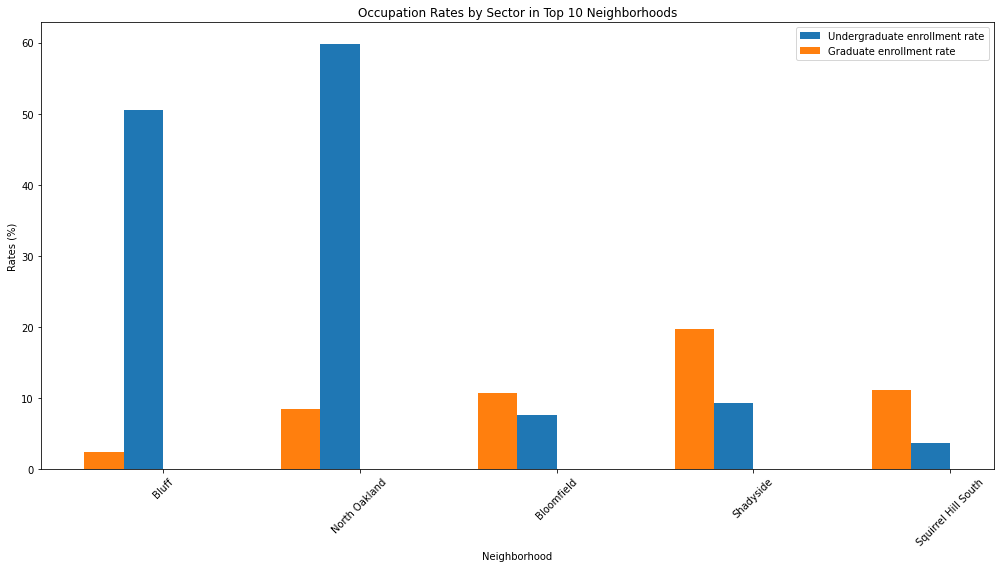

In [9]:

import matplotlib.pyplot as plt
import numpy as np

top_5_enrollment_neighborhoods = enroll_rate.sort_values(by='enrollment rate', ascending=False).head(5)


# Data preparation
n = len(top_5_enrollment_neighborhoods)  # number of neighborhoods
index = np.arange(n)  # group locations
bar_width = 0.2  # width of bars

# Creating the plot
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index + bar_width, top_5_enrollment_neighborhoods['undergraduate rate'], bar_width, label='Undergraduate enrollment rate')
bar2 = ax.bar(index, top_5_enrollment_neighborhoods['graduate rate'], bar_width, label='Graduate enrollment rate')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Enrollment Rates (%)')
ax.set_title('Graduate/Undergraduate Enrollment Rates in Top 5 Neighborhoods')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_5_enrollment_neighborhoods['Neighborhood'], rotation=45)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# Best neighborhood
Before visualization, I integrated the enrollment data with population data for each neighborhood to derive the enrollment rate.

Subsequently, I conducted comparisons and visualizations based on the enrollment rate. After assessing the total enrollment rate, I filtered the top 5 neighborhoods. 

Then, I visualized the enrollment rates for different educational levels, with particular emphasis on graduate and undergraduate enrollment rates as they reflect higher education. From the pie plots, among the top 5 neighborhoods (ranked by total enrollment rate), **North Oakland** emerged as the best neighborhood due to its highest percentage of graduate and undergraduate enrollment rates.

# Conclusion

The enrollment rate serves as a representation of both educational resources and family economic status. Among these factors, the graduate and undergraduate rates hold particular significance. Therefore, in determining the preferred neighborhood, emphasis is placed on selecting the one with the top enrollment rate as well as higheset graduate, which is **North Oakland**.